In [1]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, Isomap
from umap import UMAP
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import umap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, Isomap
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Для регрессии

In [3]:
df_reg = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\moldova_cars_task_filtered_ohe.csv', sep=',', encoding='utf-8')
df_reg = df_reg.sample(frac=0.5)
reg_label = 'Price(euro)'
reg_features = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission']
X_reg, y_reg = df_reg[reg_features].values, df_reg[reg_label].values

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_reg

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Make_ARO,Make_Abarth,Make_Acura,Make_Alfa Romeo,Make_Alta marca,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
15529,2012,120000,2000,1,11900,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14153,2008,256854,3200,1,7800,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
17601,2012,260000,2200,1,7000,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5657,2016,82236,2000,1,17899,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2799,2013,187000,3000,1,21999,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,2015,125144,1400,0,6999,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
7065,2007,258215,3000,1,9499,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
601,2016,159000,1500,0,8890,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
23180,2005,156000,2000,0,3200,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [4]:
# VarianceThreshold
print("VarianceThreshold:")
vt = VarianceThreshold()
X_train_vt = vt.fit_transform(X_train_scaled)
X_test_vt = vt.transform(X_test_scaled)
print(f"Отобрано признаков: {X_train_vt.shape[1]}")
  
selected_features_vt = [feature for feature, flag in zip(reg_features, vt.get_support()) if flag]
print("VarianceThreshold – отобранные признаки:", selected_features_vt)  


VarianceThreshold:
Отобрано признаков: 4
VarianceThreshold – отобранные признаки: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission']


In [5]:
model = DecisionTreeRegressor()
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_vt, y_train)

y_pred = grid.predict(X_test_vt)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}\n")

MSE: 24285973.39
RMSE: 4928.08
MAE: 2941.40
R²: 0.76



In [6]:
print("SelectKBest:")
skb = SelectKBest(score_func=f_regression, k=2)
X_train_skb = skb.fit_transform(X_train_scaled, y_train)
X_test_skb = skb.transform(X_test_scaled)
print("Отобранные признаки:", skb.get_support(indices=True))

selected_features_skb = [feature for feature, flag in zip(reg_features, skb.get_support()) if flag]
print("SelectKBest – отобранные признаки:", selected_features_skb)

SelectKBest:
Отобранные признаки: [0 3]
SelectKBest – отобранные признаки: ['Year', 'Transmission']


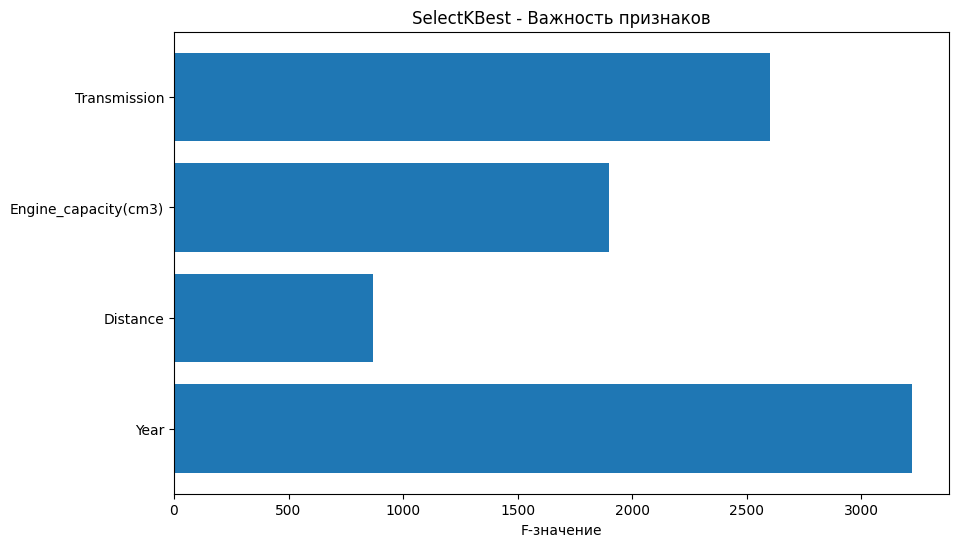

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(reg_features, skb.scores_)
plt.title("SelectKBest - Важность признаков")
plt.xlabel("F-значение")
plt.show()

In [8]:
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_skb, y_train)

y_pred = grid.predict(X_test_skb)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}\n")

MSE: 54427073.83
RMSE: 7377.47
MAE: 4253.33
R²: 0.47



In [9]:
print("RFE:")

estimator = DecisionTreeRegressor()

rfe = RFE(estimator, n_features_to_select=4)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

print("Отобранные признаки:", rfe.get_support(indices=True))
selected_features_rfe = [feature for feature, flag in zip(reg_features, rfe.get_support()) if flag]
print("RFE – отобранные признаки:", selected_features_rfe)


RFE:
Отобранные признаки: [0 1 2 3]
RFE – отобранные признаки: ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission']


In [10]:
grid = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_rfe, y_train)

y_pred = grid.predict(X_test_rfe)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}\n")

MSE: 24282163.53
RMSE: 4927.69
MAE: 2940.27
R²: 0.76



In [11]:
print("PCA:")
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Объясненная дисперсия:", sum(pca.explained_variance_ratio_))

PCA:
Объясненная дисперсия: 0.9999999999999999


In [12]:
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_pca, y_train)

y_pred = grid.predict(X_test_pca)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}\n")

MSE: 29117799.22
RMSE: 5396.09
MAE: 3099.33
R²: 0.71



In [13]:
# KernelPCA
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f"KernelPCA ({kernel}):")
    kpca = KernelPCA(n_components=4, kernel=kernel)
    X_train_kpca = kpca.fit_transform(X_train_scaled)
    X_test_kpca = kpca.transform(X_test_scaled)
    
    grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train_kpca, y_train)

    y_pred = grid.predict(X_test_kpca)

    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}\n")


KernelPCA (poly):
MSE: 26489127.66
RMSE: 5146.76
MAE: 3018.08
R²: 0.74

KernelPCA (rbf):
MSE: 38982019.08
RMSE: 6243.56
MAE: 3583.34
R²: 0.62

KernelPCA (sigmoid):
MSE: 26713093.06
RMSE: 5168.47
MAE: 3062.70
R²: 0.74



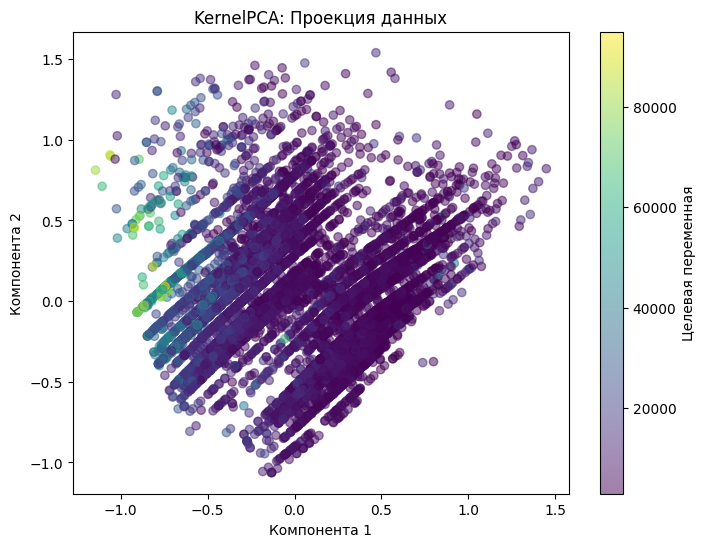

In [14]:
kpca = KernelPCA(n_components=4, kernel='sigmoid')
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Целевая переменная')
plt.title("KernelPCA: Проекция данных")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

In [15]:
print("t-SNE:")
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaler.fit_transform(X_reg))
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y_reg, test_size=0.2, random_state=42)

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_tsne, y_train_tsne)

y_pred = grid.predict(X_test_tsne)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}\n")

t-SNE:
MSE: 29100933.34
RMSE: 5394.53
MAE: 3291.99
R²: 0.71



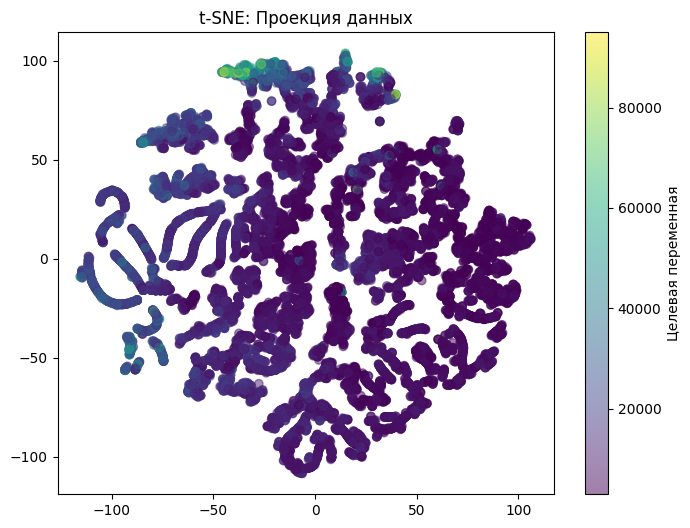

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_reg, cmap='viridis', alpha=0.5)
plt.colorbar(label='Целевая переменная')
plt.title("t-SNE: Проекция данных")
plt.show()

In [17]:
print("Isomap:")
isomap = Isomap(n_components=2, path_method='D', n_neighbors=10, neighbors_algorithm='kd_tree', n_jobs=-1)
X_train_isomap = isomap.fit_transform(X_train_scaled)
X_test_isomap = isomap.transform(X_test_scaled)

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_isomap, y_train)

y_pred = grid.predict(X_test_isomap)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}\n")

Isomap:
MSE: 55645248.71
RMSE: 7459.57
MAE: 4407.44
R²: 0.45



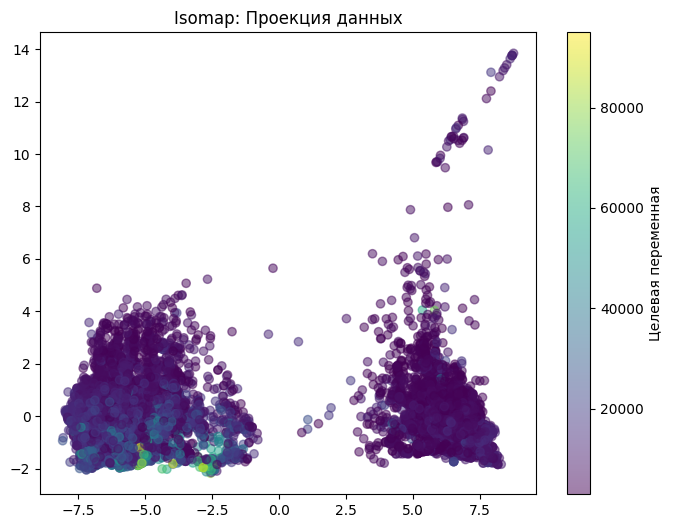

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_isomap[:, 0], X_train_isomap[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Целевая переменная')
plt.title("Isomap: Проекция данных")
plt.show()

In [19]:
print("UMAP:")
umap_model = UMAP(n_components=4, n_jobs=-1)
X_train_umap = umap_model.fit_transform(X_train_scaled)

X_test_umap = umap_model.transform(X_test_scaled)

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_umap, y_train)

y_pred = grid.predict(X_test_umap)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}\n")

UMAP:
MSE: 31071948.42
RMSE: 5574.22
MAE: 3396.10
R²: 0.70



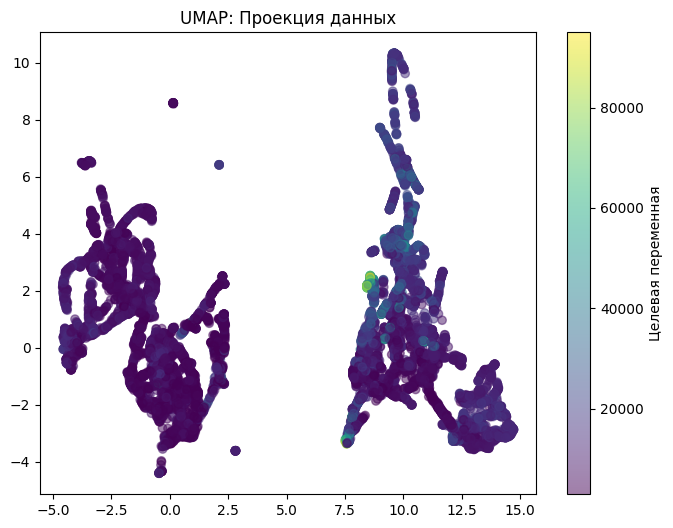

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Целевая переменная')
plt.title("UMAP: Проекция данных")
plt.show()

# Для классификации

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [22]:
df_class = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\smoke_detector_task_filtered.csv', sep=',', encoding='utf-8')
df_class = df_class.drop(['Unnamed: 0'], axis=1)
df_class = df_class.sample(frac=0.3)

class_label = 'Fire Alarm'
class_features = ['TVOC[ppb]', 'eCO2[ppm]', 'Temperature[C]', 'PM2.5', 'NC2.5', 
                  'Humidity[%]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 
                  'NC0.5', 'NC1.0']

X_class = df_class[class_features].values
y_class = df_class[class_label].values

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_class_train_scaled = scaler.fit_transform(X_class_train)
X_class_test_scaled = scaler.transform(X_class_test)


In [23]:
def plot_results(y_true, y_pred, method_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{method_name} - Confusion Matrix')
    plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{method_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [24]:
print("VarianceThreshold:")
vt = VarianceThreshold() 
X_vt_train = vt.fit_transform(X_class_train_scaled)
X_vt_test = vt.transform(X_class_test_scaled)
print(f"Отобрано признаков: {X_vt_train.shape[1]}")
  
selected_features_vt = [feature for feature, flag in zip(class_features, vt.get_support()) if flag]
print("VarianceThreshold – отобранные признаки:", selected_features_vt)    


VarianceThreshold:
Отобрано признаков: 12
VarianceThreshold – отобранные признаки: ['TVOC[ppb]', 'eCO2[ppm]', 'Temperature[C]', 'PM2.5', 'NC2.5', 'Humidity[%]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'NC0.5', 'NC1.0']


In [25]:
gbc = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [70, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7]
}

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_vt_train, y_class_train)


y_pred = grid_search.predict(X_vt_test)
print("\nClassification Report:\n", classification_report(y_class_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00      2610

    accuracy                           1.00      3593
   macro avg       1.00      1.00      1.00      3593
weighted avg       1.00      1.00      1.00      3593



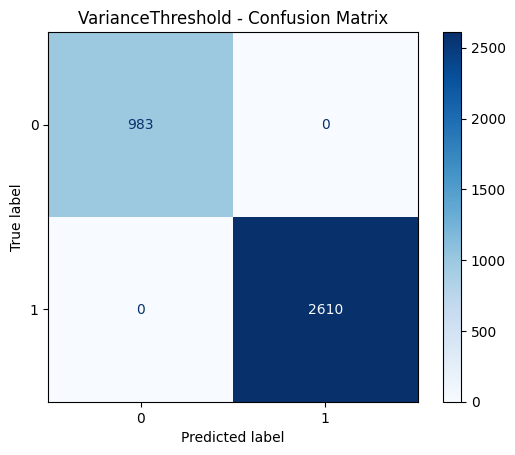

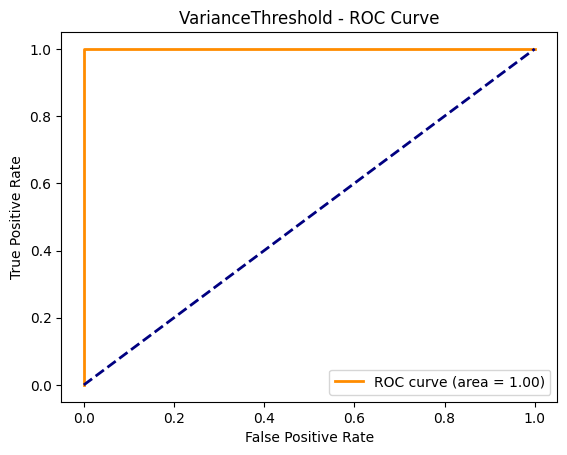

In [26]:
plot_results(y_class_test, y_pred, "VarianceThreshold")

In [27]:
print("SelectKBest:")
skb = SelectKBest(score_func=f_classif, k=4)
X_skb_train = skb.fit_transform(X_class_train_scaled, y_class_train)
X_skb_test = skb.transform(X_class_test_scaled)
print("Отобранные признаки:", skb.get_support(indices=True))
selected_features_skb = [feature for feature, flag in zip(class_features, skb.get_support()) if flag]
print("SelectKBest – отобранные признаки:", selected_features_skb)



SelectKBest:
Отобранные признаки: [1 5 7 8]
SelectKBest – отобранные признаки: ['eCO2[ppm]', 'Humidity[%]', 'Raw Ethanol', 'Pressure[hPa]']


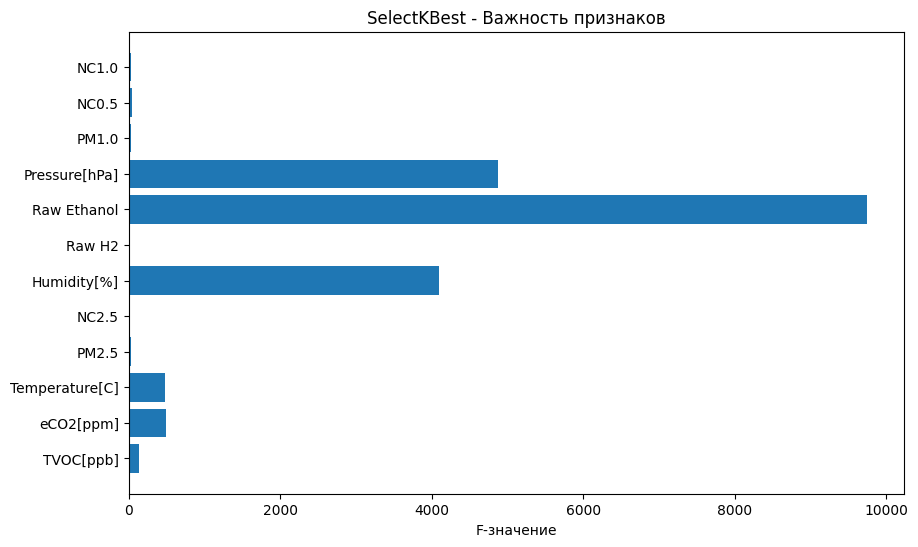

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(class_features, skb.scores_)
plt.title("SelectKBest - Важность признаков")
plt.xlabel("F-значение")
plt.show()

In [29]:
gbc = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_skb_train, y_class_train)


y_pred = grid_search.predict(X_skb_test)
print("\nClassification Report:\n", classification_report(y_class_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       983
           1       0.99      0.99      0.99      2610

    accuracy                           0.98      3593
   macro avg       0.98      0.98      0.98      3593
weighted avg       0.98      0.98      0.98      3593



In [30]:
print("RFE:")
estimator = LogisticRegression(max_iter=100)
rfe = RFE(estimator, n_features_to_select=4)
X_rfe_train = rfe.fit_transform(X_class_train_scaled, y_class_train)
X_rfe_test = rfe.transform(X_class_test_scaled)
print("Отобранные признаки:", rfe.get_support(indices=True))
selected_features_rfe = [feature for feature, flag in zip(class_features, rfe.get_support()) if flag]
print("RFE – отобранные признаки:", selected_features_rfe)

RFE:
Отобранные признаки: [ 0  6  7 10]
RFE – отобранные признаки: ['TVOC[ppb]', 'Raw H2', 'Raw Ethanol', 'NC0.5']


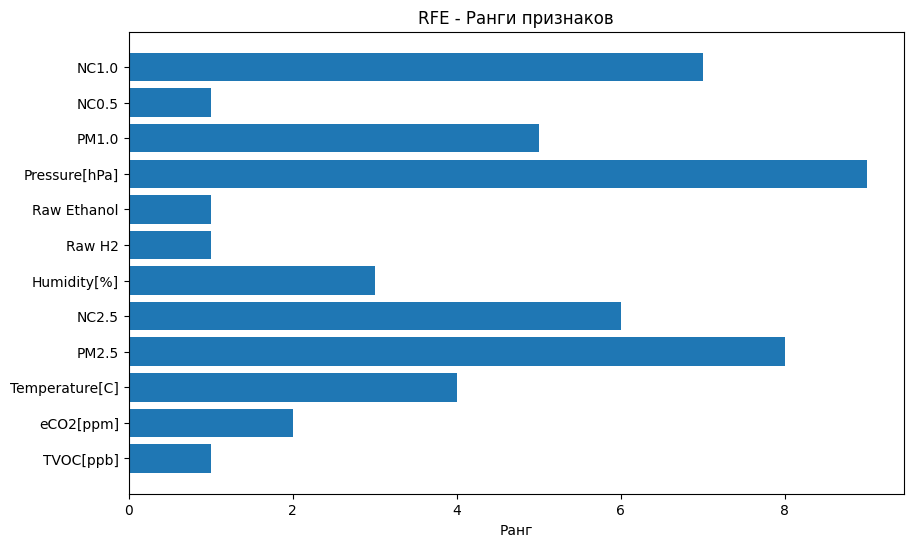

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(class_features, rfe.ranking_)
plt.title("RFE - Ранги признаков")
plt.xlabel("Ранг")
plt.show()

In [32]:
gbc = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_rfe_train, y_class_train)

y_pred = grid_search.predict(X_rfe_test)
print("\nClassification Report:\n", classification_report(y_class_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00      2610

    accuracy                           1.00      3593
   macro avg       1.00      1.00      1.00      3593
weighted avg       1.00      1.00      1.00      3593



In [34]:
print("PCA:")
pca = PCA(n_components=3)
X_pca_train = pca.fit_transform(X_class_train_scaled)
X_pca_test = pca.transform(X_class_test_scaled)
print("PCA – объяснённая дисперсия компонент:", sum(pca.explained_variance_ratio_))

PCA:
PCA – объяснённая дисперсия компонент: 0.7378795885879865


In [35]:
gbc = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_pca_train, y_class_train)

y_pred = grid_search.predict(X_pca_test)
print("\nClassification Report:\n", classification_report(y_class_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       983
           1       0.98      0.98      0.98      2610

    accuracy                           0.97      3593
   macro avg       0.97      0.96      0.96      3593
weighted avg       0.97      0.97      0.97      3593



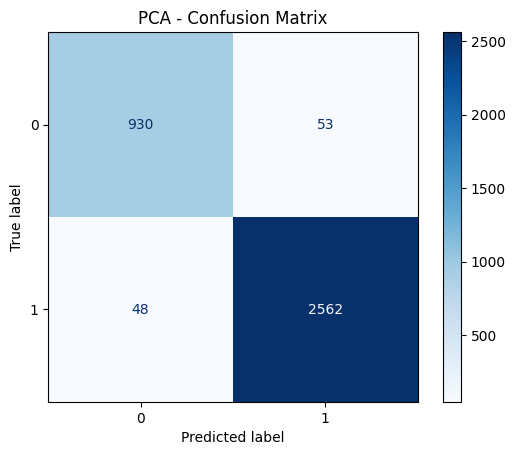

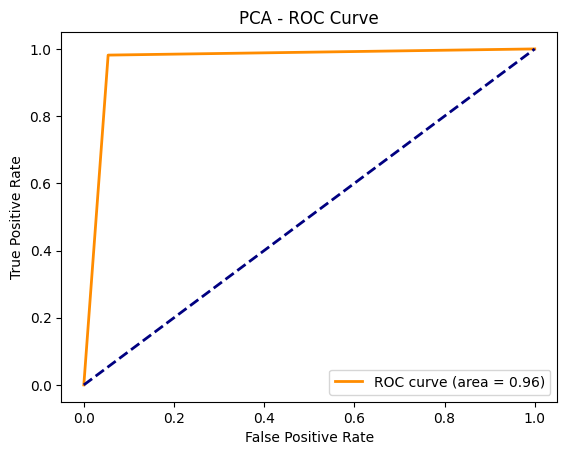

In [36]:
plot_results(y_class_test, y_pred, "PCA")

KernelPCA (rbf):


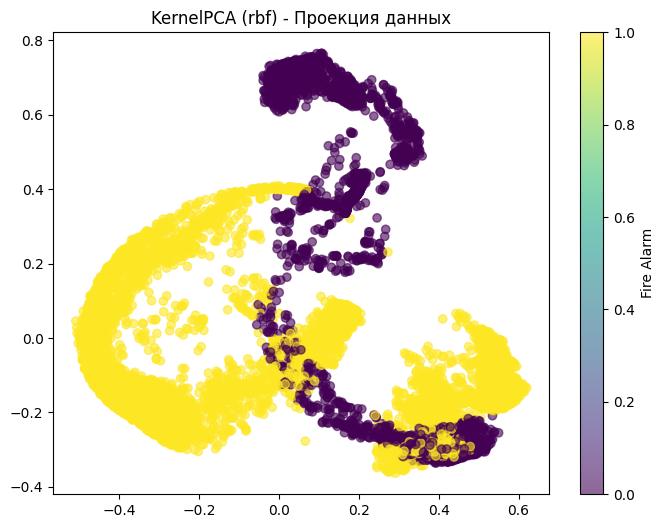

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       983
           1       0.96      0.98      0.97      2610

    accuracy                           0.95      3593
   macro avg       0.94      0.93      0.94      3593
weighted avg       0.95      0.95      0.95      3593

KernelPCA (sigmoid):


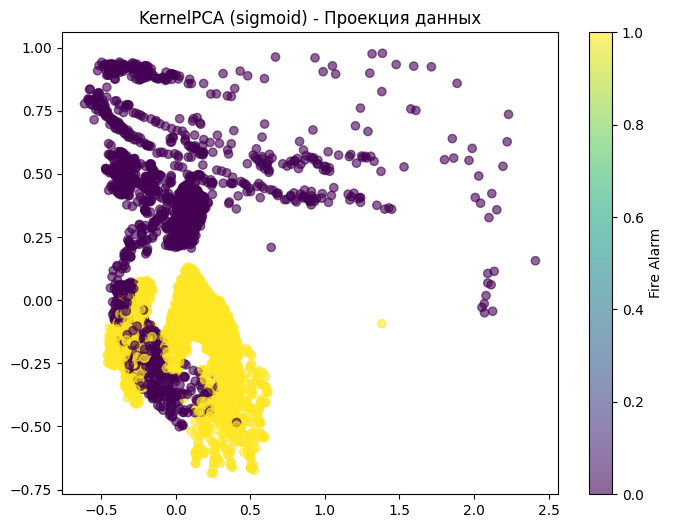

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       983
           1       0.94      0.98      0.96      2610

    accuracy                           0.94      3593
   macro avg       0.93      0.90      0.92      3593
weighted avg       0.94      0.94      0.93      3593

KernelPCA (poly):


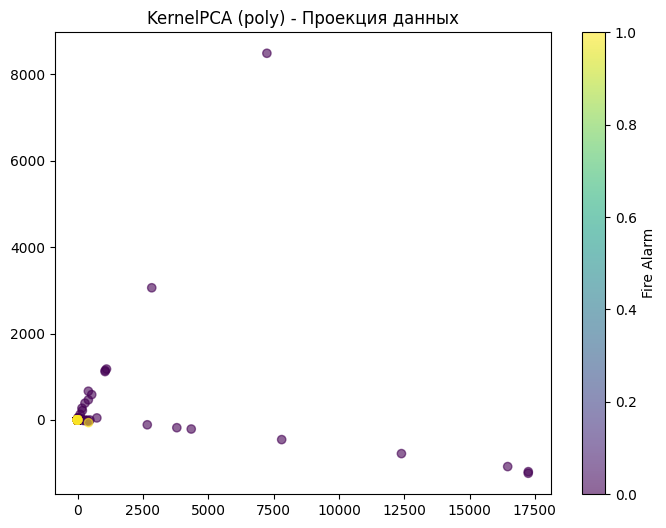

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.79      0.53      0.64       983
           1       0.84      0.95      0.89      2610

    accuracy                           0.83      3593
   macro avg       0.82      0.74      0.76      3593
weighted avg       0.83      0.83      0.82      3593



In [37]:
# KernelPCA
kernels = ['rbf', 'sigmoid', 'poly']
for kernel in kernels:
    print(f"KernelPCA ({kernel}):")
    kpca = KernelPCA(n_components=2, kernel=kernel)
    X_train_kpca = kpca.fit_transform(X_class_train_scaled)
    X_test_kpca = kpca.transform(X_class_test_scaled)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_class_train, cmap='viridis', alpha=0.6)
    plt.title(f"KernelPCA ({kernel}) - Проекция данных")
    plt.colorbar(label='Fire Alarm')
    plt.show()

    grid = GridSearchCV(gbc, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    grid.fit(X_train_kpca, y_class_train)
    y_pred = grid.predict(X_test_kpca)
    print(classification_report(y_class_test, y_pred))

t-SNE:


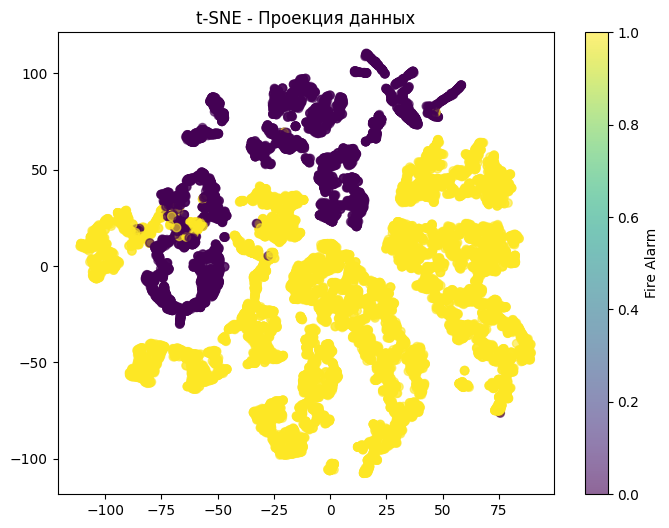

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       983
           1       0.85      0.92      0.88      2610

    accuracy                           0.83      3593
   macro avg       0.79      0.75      0.77      3593
weighted avg       0.82      0.83      0.82      3593



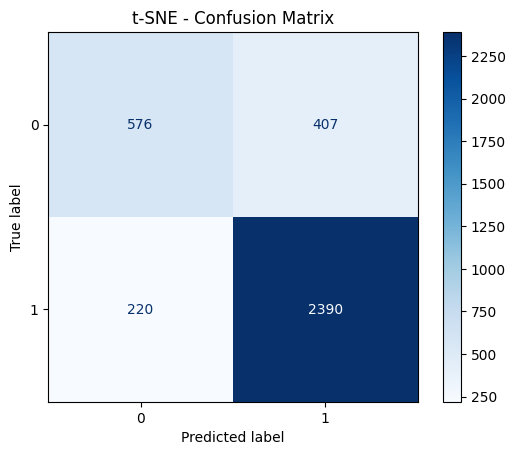

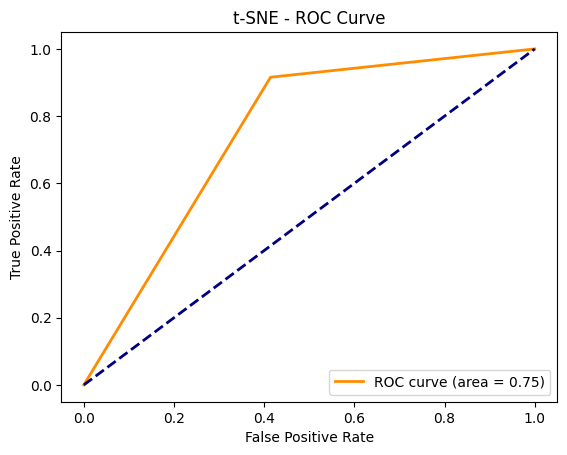

In [38]:
print("t-SNE:")
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne_train = tsne.fit_transform(X_class_train_scaled)

X_tsne_train = tsne.fit_transform(X_class_train_scaled)
X_tsne_test = tsne.fit_transform(X_class_test_scaled) 

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=y_class_train, cmap='viridis', alpha=0.6)
plt.title("t-SNE - Проекция данных")
plt.colorbar(label='Fire Alarm')
plt.show()

grid_search = GridSearchCV(gbc, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_tsne_train, y_class_train)
y_pred = grid_search.predict(X_tsne_test)
print(classification_report(y_class_test, y_pred))
plot_results(y_class_test, y_pred, "t-SNE")

Isomap:


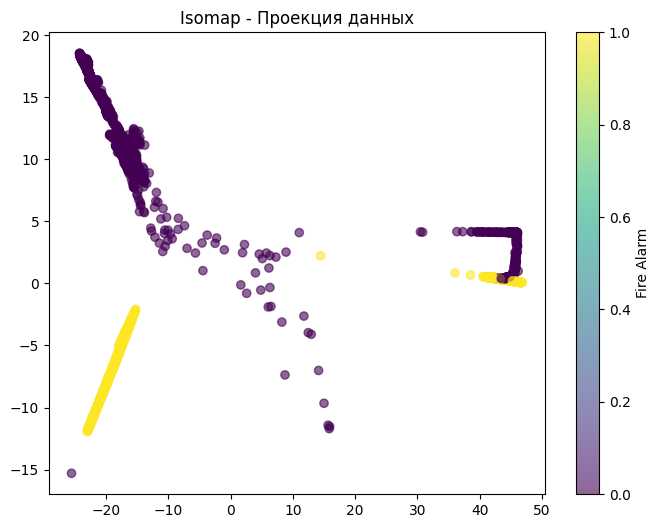

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       983
           1       0.99      0.98      0.98      2610

    accuracy                           0.98      3593
   macro avg       0.97      0.97      0.97      3593
weighted avg       0.98      0.98      0.98      3593



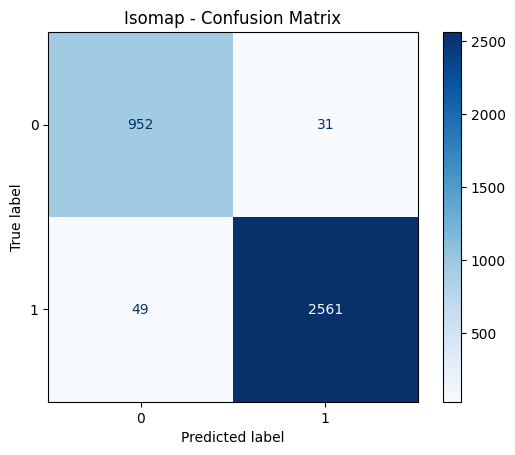

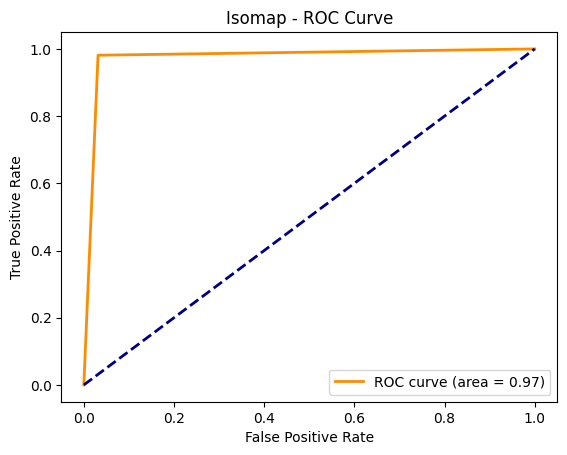

In [41]:
print("Isomap:")
isomap = Isomap(n_components=2, n_neighbors=20, path_method='D', neighbors_algorithm='kd_tree', n_jobs=-1)
X_isomap_train = isomap.fit_transform(X_class_train_scaled)
X_isomap_test = isomap.transform(X_class_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_isomap_train[:, 0], X_isomap_train[:, 1], c=y_class_train, cmap='viridis', alpha=0.6)
plt.title("Isomap - Проекция данных")
plt.colorbar(label='Fire Alarm')
plt.show()

grid_search = GridSearchCV(gbc, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_isomap_train, y_class_train)
y_pred = grid_search.predict(X_isomap_test)
print(classification_report(y_class_test, y_pred))
plot_results(y_class_test, y_pred, "Isomap")

UMAP:


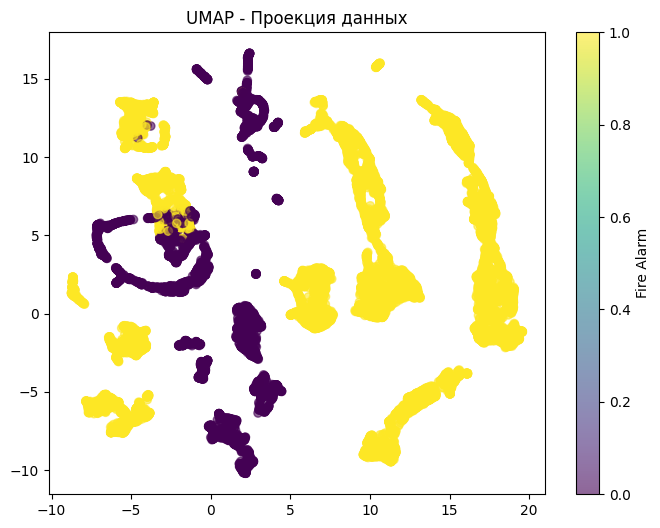

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       983
           1       1.00      0.99      0.99      2610

    accuracy                           0.99      3593
   macro avg       0.99      0.99      0.99      3593
weighted avg       0.99      0.99      0.99      3593



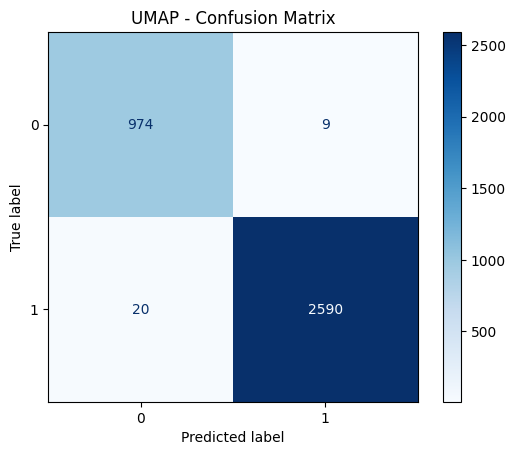

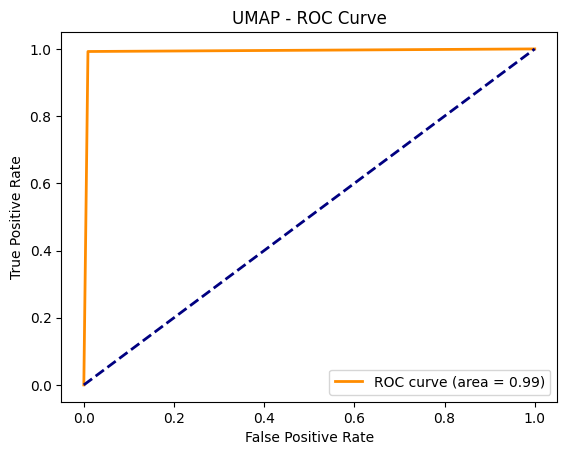

In [42]:
print("UMAP:")
umap_reducer = umap.UMAP(n_components=2, n_jobs=-1)
X_umap_train = umap_reducer.fit_transform(X_class_train_scaled)

X_umap_test = umap_reducer.transform(X_class_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_class_train, cmap='viridis', alpha=0.6)
plt.title("UMAP - Проекция данных")
plt.colorbar(label='Fire Alarm')
plt.show()

grid_search = GridSearchCV(gbc, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_umap_train, y_class_train)
y_pred = grid_search.predict(X_umap_test)
print(classification_report(y_class_test, y_pred))
plot_results(y_class_test, y_pred, "UMAP")